# Fantasy Football Project

### Jakob Holcomb and Nick Schnurr

In [1]:
# Filtering 

In [22]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import csv
from webdriver_manager.chrome import ChromeDriverManager


In [23]:

# Set up the Chrome driver (use ChromeDriverManager to handle the driver version)
options = Options()
options.headless = False  # Set to True to run in headless mode
service = Service(ChromeDriverManager().install())  # Automatically manage driver version
driver = webdriver.Chrome(service=service, options=options)

# URL of the filtered results page
url = 'https://www.fantasyaftermath.com/#'  # Replace with the filtered URL

# Open the page with Selenium
driver.get(url)

# Wait for the dropdown element to be available (WebDriverWait with expected condition)
wait = WebDriverWait(driver, 10)  # Wait up to 10 seconds
week_select = wait.until(EC.presence_of_element_located((By.ID, 'weekSelect')))

# Initialize the Select object for the dropdown
week_select = Select(week_select)

# Debugging: Print out all the available options in the dropdown
options = week_select.options
for option in options:
    print(f"Option text: {option.text}, Option value: {option.get_attribute('value')}")

# List of years you want to select
years = ['2019', '2020', '2021', '2022', '2023']

# Open a CSV file to write the data
with open('fantasy_football_data_all_years_1ppr.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Player', 'Position', 'Team', 'Fantasy Diff', 'Actual Fantasy Points', 'Projected Fantasy Points',
                     'Pass Yards', 'Pass TDs', 'Pass INTs', 'Rush Att', 'Rush Yards', 'Rush TDs', 'Rec Yards', 'Rec TDs', 'Receptions'])

    # Function to scrape the current page's data
    def scrape_page():
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, 'html.parser')

        # Find the rows of data (adjust the selector based on the page structure)
        rows = soup.select('div.row.dataRow')  # Update this with the correct selector for rows

        # Iterate over each row and extract the relevant data
        for row in rows:
            try:
                player = row.select_one('.dpPlayer').get_text(strip=True) if row.select_one('.dpPlayer') else "N/A"
                pos_team = row.select_one('.playerHeader').get_text(strip=True) if row.select_one('.playerHeader') else "N/A"
                fantasy_diff = row.select_one('.dpDiff').get_text(strip=True) if row.select_one('.dpDiff') else "N/A"
                actual_points = row.select_one('.fantasyStandard .dataLeft').get_text(strip=True) if row.select_one('.fantasyStandard .dataLeft') else "N/A"
                projected_points = row.select_one('.fantasyStandard .dataRight').get_text(strip=True) if row.select_one('.fantasyStandard .dataRight') else "N/A"

                # Extract stats like passing yards, rushing yards, receptions, etc.
                pass_yds = row.select_one('.dpPassingYds .spanData').get_text(strip=True) if row.select_one('.dpPassingYds .spanData') else "N/A"
                pass_tds = row.select_one('.dpPassingTds .spanData').get_text(strip=True) if row.select_one('.dpPassingTds .spanData') else "N/A"
                pass_ints = row.select_one('.dpPassingInts .spanData').get_text(strip=True) if row.select_one('.dpPassingInts .spanData') else "N/A"
                rush_att = row.select_one('.dpRushingAtt .spanData').get_text(strip=True) if row.select_one('.dpRushingAtt .spanData') else "N/A"
                rush_yds = row.select_one('.dpRushingYds .spanData').get_text(strip=True) if row.select_one('.dpRushingYds .spanData') else "N/A"
                rush_tds = row.select_one('.dpRushingTds .spanData').get_text(strip=True) if row.select_one('.dpRushingTds .spanData') else "N/A"
                rec_yds = row.select_one('.dpReceivingYds .spanData').get_text(strip=True) if row.select_one('.dpReceivingYds .spanData') else "N/A"
                rec_tds = row.select_one('.dpReceivingTds .spanData').get_text(strip=True) if row.select_one('.dpReceivingTds .spanData') else "N/A"
                recs = row.select_one('.dpReceivingRec .spanData').get_text(strip=True) if row.select_one('.dpReceivingRec .spanData') else "N/A"

                # Write the data row to the CSV file
                writer.writerow([player, pos_team, fantasy_diff, actual_points, projected_points, pass_yds, pass_tds, pass_ints,
                                 rush_att, rush_yds, rush_tds, rec_yds, rec_tds, recs])

            except Exception as e:
                print(f"Error processing row: {e}")

    # Loop to select each year (2019-2023) and scrape the data
    for year in years:
        try:
            year_option = f"all{year}"  # Format option value for years like 'all2019', 'all2020', etc.
            print(f"Attempting to select: {year_option}")
            
            # Select by visible text (for debugging purposes, we try both select_by_visible_text and select_by_value)
            try:
                print(f"Selecting by visible text: {year_option} Season")
                week_select.select_by_visible_text(f"{year_option} Season")  # Try selecting using visible text
            except Exception as e:
                print(f"Error selecting by visible text: {e}")

            try:
                print(f"Selecting by value: all{year}")
                week_select.select_by_value(f"all{year}")  # Try selecting using value
            except Exception as e:
                print(f"Error selecting by value: {e}")
            
            time.sleep(3)  # Wait for the page to load or data to update
            
            # Scrape the data for the selected year
            scrape_page()

        except Exception as e:
            print(f"Error occurred while selecting year {year}: {e}")

# Close the WebDriver after scraping all pages
driver.quit()

print("Data has been written to fantasy_football_data_all_years_1ppr.csv")


Attempting to select: all2019
Selecting by visible text: all2019 Season
Error selecting by visible text: Message: Could not locate element with visible text: all2019 Season; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception

Selecting by value: all2019
Error selecting by value: Message: Cannot locate option with value: all2019; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception

Attempting to select: all2020
Selecting by visible text: all2020 Season
Error selecting by visible text: Message: Could not locate element with visible text: all2020 Season; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception

Selecting by value: all2020
Attempting to select: all2021
Selecting by visible text: all2021 Season
Error sel

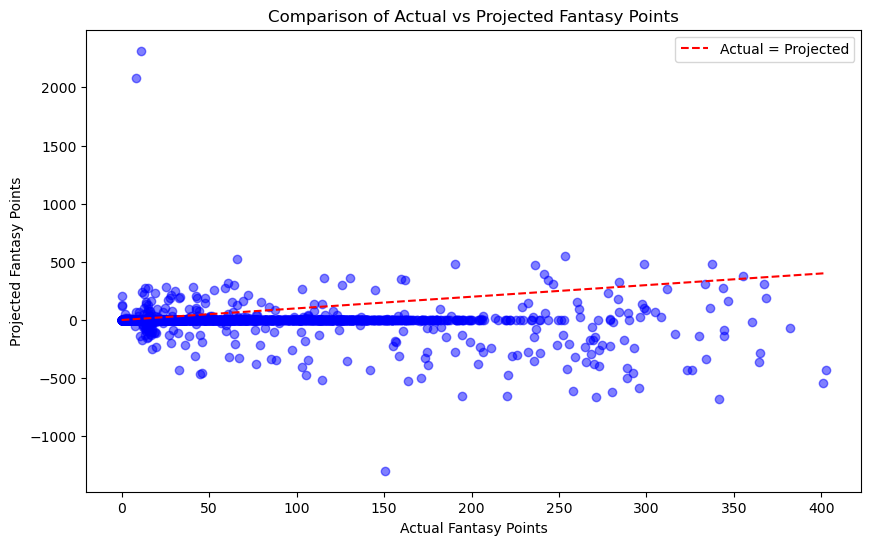

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('fantasy_football_data_all_years_1ppr.csv')

# Drop rows with missing data in the columns we care about (Actual Fantasy Points and Projected Fantasy Points)
df = df.dropna(subset=['Actual Fantasy Points', 'Projected Fantasy Points'])

# Convert 'Actual Fantasy Points' and 'Projected Fantasy Points' columns to numeric (in case of any non-numeric data)
df['Actual Fantasy Points'] = pd.to_numeric(df['Actual Fantasy Points'], errors='coerce')
df['Projected Fantasy Points'] = pd.to_numeric(df['Projected Fantasy Points'], errors='coerce')

# Drop rows with invalid values after conversion
df = df.dropna(subset=['Actual Fantasy Points', 'Projected Fantasy Points'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Actual Fantasy Points'], df['Projected Fantasy Points'], color='blue', alpha=0.5)

# Add a line of equality for reference (where Actual Points = Projected Points)
plt.plot([min(df['Actual Fantasy Points']), max(df['Actual Fantasy Points'])], 
         [min(df['Actual Fantasy Points']), max(df['Actual Fantasy Points'])], 
         color='red', linestyle='--', label='Actual = Projected')

# Customize the plot
plt.title('Comparison of Actual vs Projected Fantasy Points')
plt.xlabel('Actual Fantasy Points')
plt.ylabel('Projected Fantasy Points')
plt.legend()

# Show the plot
plt.show()


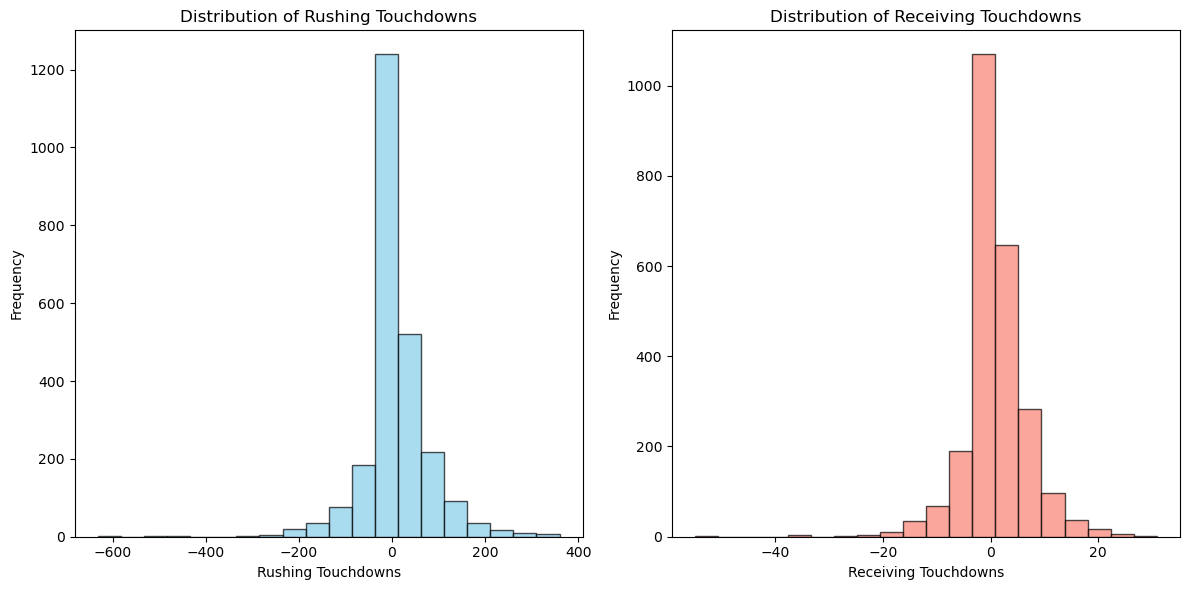

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('fantasy_football_data_all_years_1ppr.csv')

# Convert 'Rush TDs' and 'Rec TDs' columns to numeric (in case of any non-numeric data)
df['Rush TDs'] = pd.to_numeric(df['Rush TDs'], errors='coerce')
df['Rec TDs'] = pd.to_numeric(df['Rec TDs'], errors='coerce')

# Drop rows with invalid or missing values in 'Rush TDs' and 'Rec TDs'
df = df.dropna(subset=['Rush TDs', 'Rec TDs'])

# Plot the distributions using histograms
plt.figure(figsize=(12, 6))

# Plot the distribution of Rushing TDs
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, 1st subplot)
plt.hist(df['Rush TDs'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Rushing Touchdowns')
plt.xlabel('Rushing Touchdowns')
plt.ylabel('Frequency')

# Plot the distribution of Receiving TDs
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, 2nd subplot)
plt.hist(df['Rec TDs'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribution of Receiving Touchdowns')
plt.xlabel('Receiving Touchdowns')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


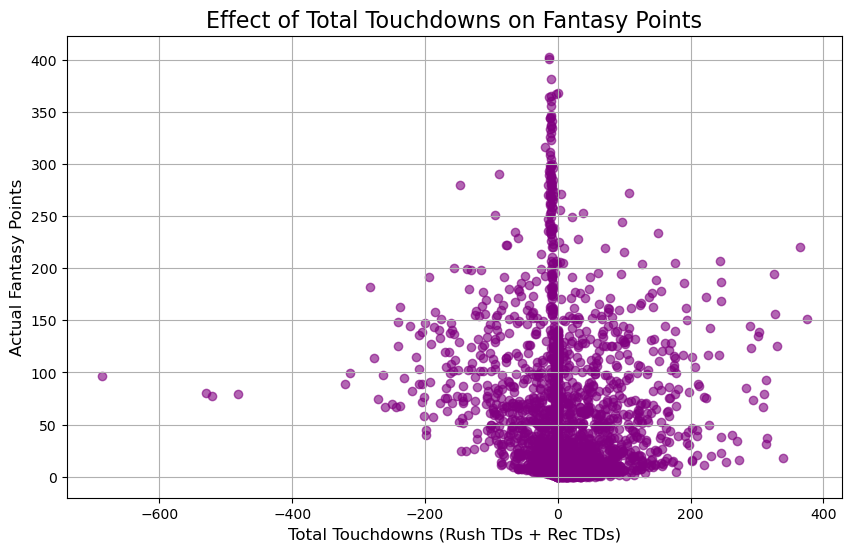

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('fantasy_football_data_all_years_1ppr.csv')

# Convert 'Rush TDs', 'Rec TDs', and 'Fantasy Points' columns to numeric (in case of any non-numeric data)
df['Pass TDs'] = pd.to_numeric(df['Pass TDs'], errors='coerce')
df['Rush TDs'] = pd.to_numeric(df['Rush TDs'], errors='coerce')
df['Rec TDs'] = pd.to_numeric(df['Rec TDs'], errors='coerce')
df['Actual Fantasy Points'] = pd.to_numeric(df['Actual Fantasy Points'], errors='coerce')

# Drop rows with invalid or missing values in 'Rush TDs', 'Rec TDs' and 'Actual Fantasy Points'
df = df.dropna(subset=['Rush TDs', 'Rec TDs', 'Actual Fantasy Points'])

# Calculate Total Touchdowns
df['Total TDs'] = df['Rush TDs'] + df['Rec TDs'] + df['Pass TDs']

# Plot the relationship between Total TDs and Fantasy Points
plt.figure(figsize=(10, 6))

# Scatter plot of Total Fantasy Points vs Total Touchdowns
plt.scatter(df['Total TDs'], df['Actual Fantasy Points'], alpha=0.6, color='purple')

# Adding titles and labels
plt.title('Effect of Total Touchdowns on Fantasy Points', fontsize=16)
plt.xlabel('Total Touchdowns (Rush TDs + Rec TDs)', fontsize=12)
plt.ylabel('Actual Fantasy Points', fontsize=12)

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()


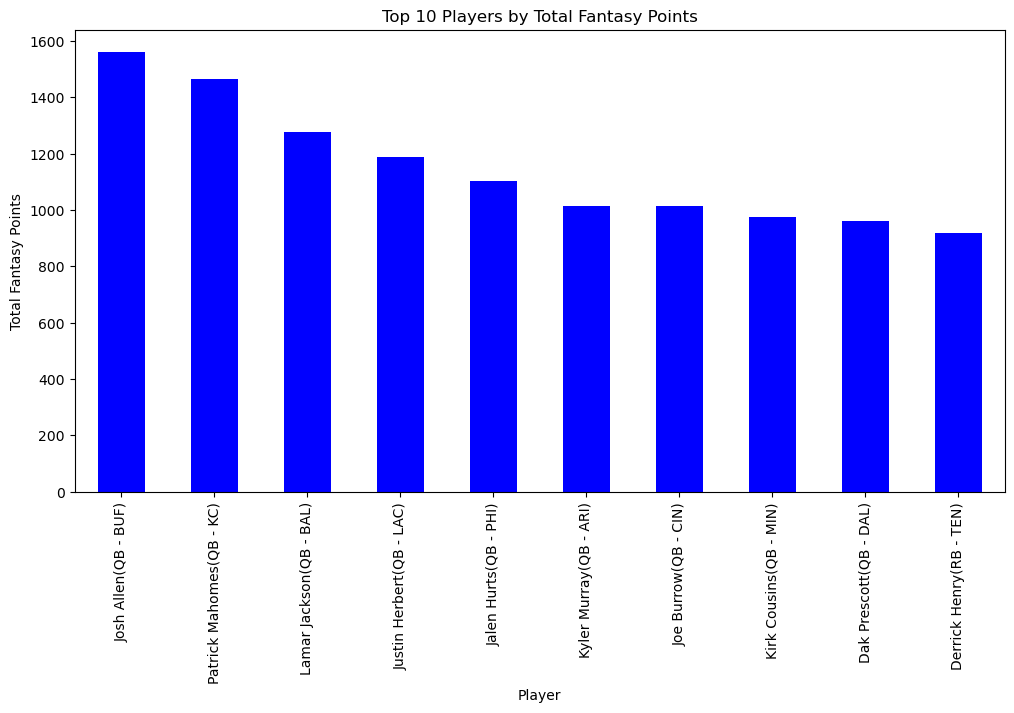

In [43]:
# Group by player and sum fantasy points
player_points = df.groupby('Player')['Actual Fantasy Points'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
player_points.plot(kind='bar', color='blue')
plt.title('Top 10 Players by Total Fantasy Points')
plt.xlabel('Player')
plt.ylabel('Total Fantasy Points')
plt.show()




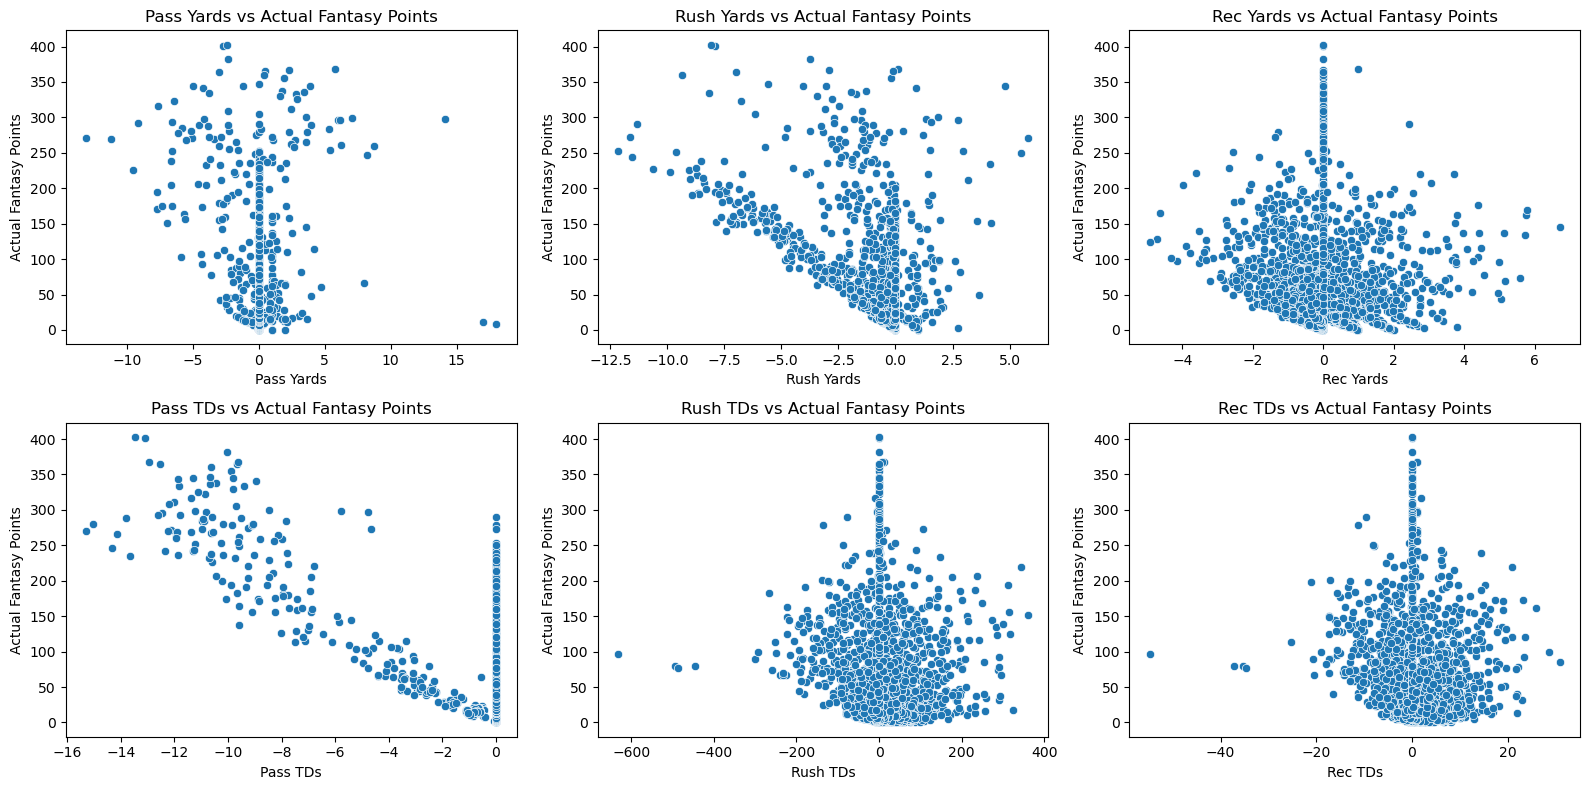

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant statistics and fantasy points columns
stats = df[['Actual Fantasy Points', 'Pass Yards', 'Rush Yards', 'Rec Yards', 'Pass TDs', 'Rush TDs', 'Rec TDs']]

# Handle missing values - fill NaNs with 0 for this example
stats_filled = stats.fillna(0)

# Plot scatter plots for each stat vs. Actual Fantasy Points
fig, axes = plt.subplots(2, 3, figsize=(16, 8))  # 2 rows and 4 columns
axes = axes.flatten()

# List of stats to compare
stats_columns = ['Pass Yards', 'Rush Yards', 'Rec Yards','Pass TDs', 'Rush TDs', 'Rec TDs']

for i, stat in enumerate(stats_columns):
    sns.scatterplot(x=stats_filled[stat], y=stats_filled['Actual Fantasy Points'], ax=axes[i])
    axes[i].set_title(f'{stat} vs Actual Fantasy Points')
    axes[i].set_xlabel(stat)
    axes[i].set_ylabel('Actual Fantasy Points')

plt.tight_layout()
plt.show()
